# Modeling the 2016 US Presidential Election using Random Forest Regression and Classification
*Method inspired by [Full Titanic Example with Random Forest](https://www.youtube.com/watch?v=0GrciaGYzV0)*


## Loading the data:

In [1]:
import pandas as pd
from constants import *

census_data = pd.read_csv('combined_data.csv')

X = census_data[feature_cols]
y = census_data['Democrat']

## Fitting the classifier model:

In [2]:
from sklearn.ensemble import RandomForestClassifier

rf_classification_model = RandomForestClassifier(n_estimators=100, oob_score=True,random_state=42)

rf_classification_model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

## Plotting feature importance

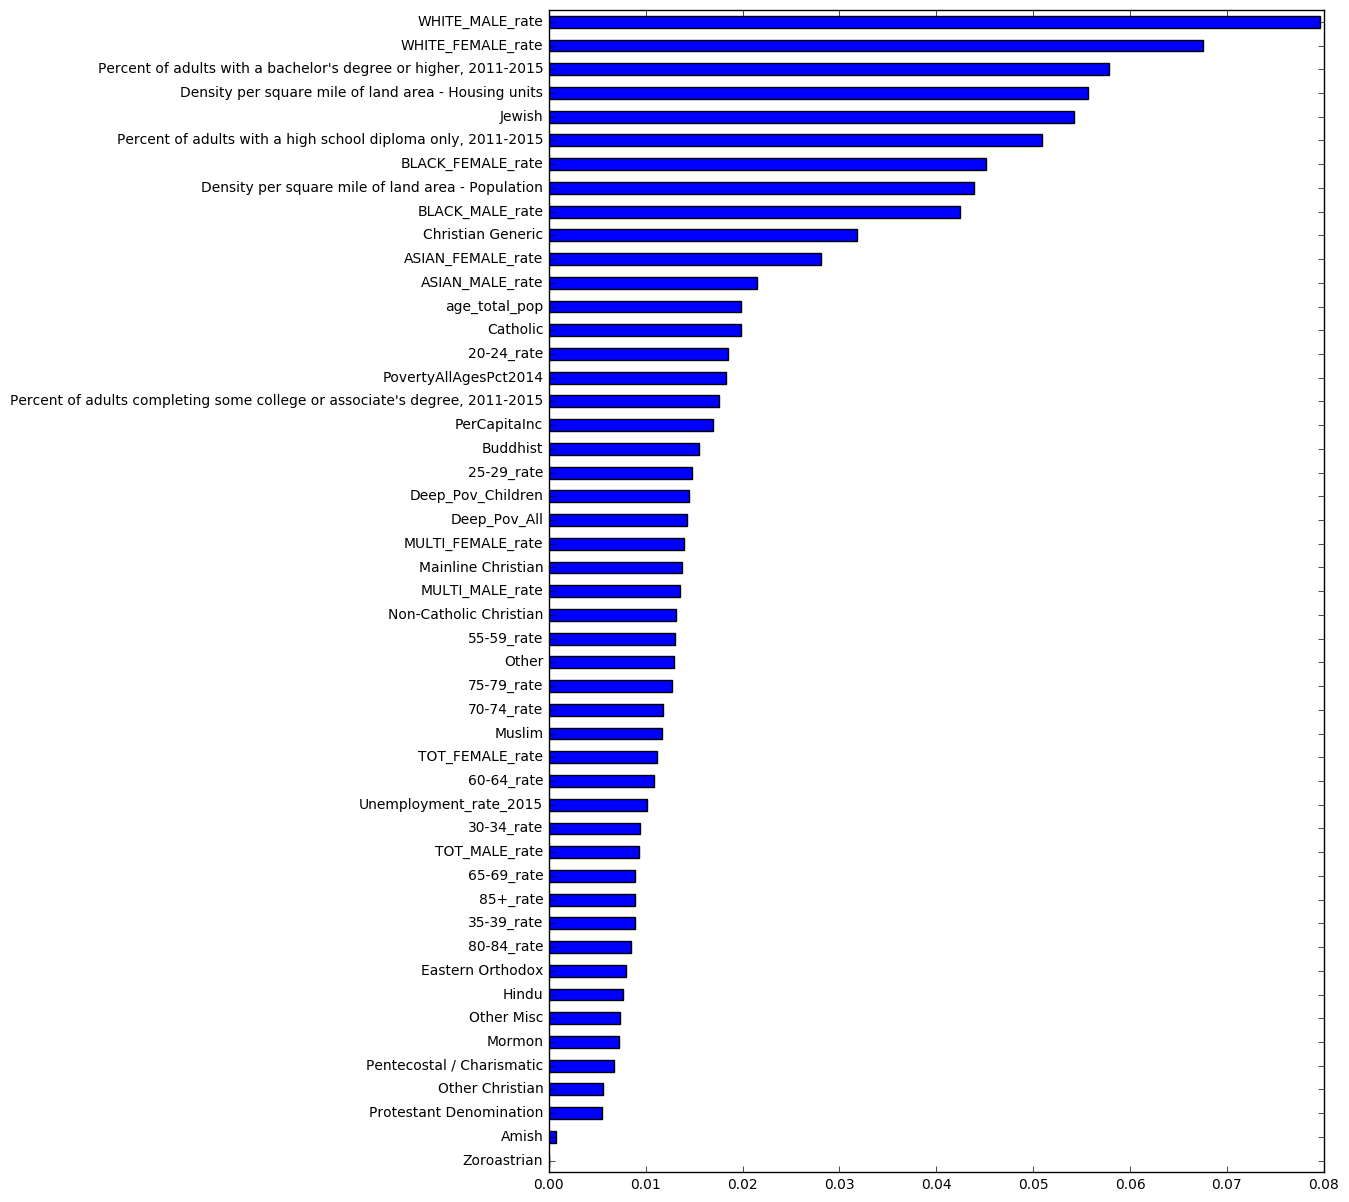

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_importances = pd.Series(rf_classification_model.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(10,15));

# Hyperparameter optimization

## Finding the optimal number of trees:

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


30 trees
roc: 0.955106111357

50 trees
roc: 0.958815710637

100 trees
roc: 0.958058133729

200 trees
roc: 0.958338518537

500 trees
roc: 0.959078365114

1000 trees
roc: 0.959640531067

2000 trees
roc: 0.960222781933



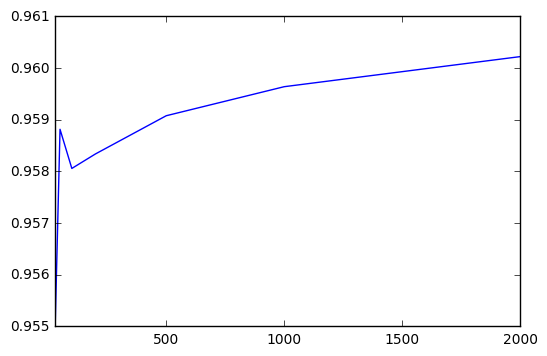

In [6]:
from sklearn.cross_validation import cross_val_score

results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    rf_classification_model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=42)
    rf_classification_model.fit(X, y)
    print trees, "trees"
    scores = cross_val_score(rf_classification_model, X, y, cv=10, scoring='roc_auc')
    roc = scores.mean()
    print "roc:", roc
    results.append(roc)
    print ""

pd.Series(results, n_estimator_options).plot();

### Finding the optimal number of features to consider when looking for the best split

auto option
roc: 0.936664691927

None option
roc: 0.925100399203

sqrt option
roc: 0.936664691927

log2 option
roc: 0.932812334607

0.9 option
roc: 0.925746591081

0.2 option
roc: 0.934420071596



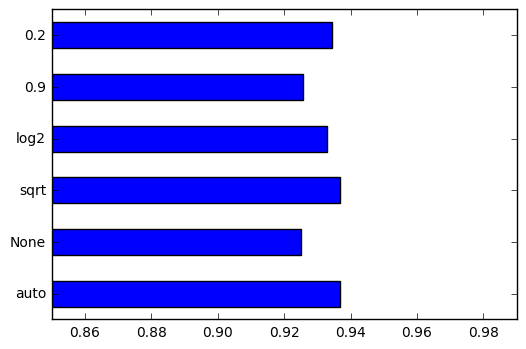

In [7]:
results = []
max_feature_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_feature_options:
    rf_classifier_model = RandomForestClassifier(n_estimators = 2000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    rf_classifier_model.fit(X, y)
    print max_features, "option"
    scores = cross_val_score(rf_classifier_model, X, y, cv=10, scoring='accuracy')
    roc = scores.mean()
    print "roc:", roc
    results.append(roc)
    print ""

pd.Series(results, max_feature_options).plot(kind="barh", xlim=(.85, .99));

## Finding the optimal number for the minimum number of samples required to be at a leaf node:

## Evaluate models based on ROC AUC score:

### Logistic regression:

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.894254658922


### K-nearest neighbors:

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# 10-fold cross-validation with K=31 for KNN
knn = KNeighborsClassifier(n_neighbors=21, leaf_size=20)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print(scores.mean())

0.8736487863


### Random forest classifier:

In [3]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier


rf_class_model = RandomForestClassifier(n_estimators = 2000,
                             oob_score = True,
                             n_jobs = -1,
                             random_state=42,
                             max_features = 0.2,
                             min_samples_leaf = 1)

rf_class_model.fit(X, y)
scores = cross_val_score(rf_class_model, X, y, cv=10, scoring='accuracy')
print(scores.mean())

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.928145634057
